### Gauusian method

In [1]:
import numpy as np
import pandas as pd

#####Data Set####
df=pd.read_csv("MiningProcess_Flotation_Plant_Database.csv",nrows=10000)

In [2]:
df.columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [3]:
df.head(2)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"


In [4]:
df=df.replace(',','',regex=True)

In [5]:
df.isna().any()

date                            False
% Iron Feed                     False
% Silica Feed                   False
Starch Flow                     False
Amina Flow                      False
Ore Pulp Flow                   False
Ore Pulp pH                     False
Ore Pulp Density                False
Flotation Column 01 Air Flow    False
Flotation Column 02 Air Flow    False
Flotation Column 03 Air Flow    False
Flotation Column 04 Air Flow    False
Flotation Column 05 Air Flow    False
Flotation Column 06 Air Flow    False
Flotation Column 07 Air Flow    False
Flotation Column 01 Level       False
Flotation Column 02 Level       False
Flotation Column 03 Level       False
Flotation Column 04 Level       False
Flotation Column 05 Level       False
Flotation Column 06 Level       False
Flotation Column 07 Level       False
% Iron Concentrate              False
% Silica Concentrate            False
dtype: bool

In [6]:
df.isna().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [7]:
 df.describe(include='all')

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,56,8,7,7783,4937,2589,7707,3985,1028,1583,...,979,3241,7454,6165,8638,7917,5557,8263,49,51
top,2017-03-10 20:00:00,5599,898,34043,547485,397852,103735,175,24895,250488,...,250269,550537,54885,55412,550,54197,5595,54183,6621,3865
freq,180,1620,1620,11,24,56,31,1481,177,76,...,252,84,33,34,10,22,23,17,720,360


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   date                          10000 non-null  object
 1   % Iron Feed                   10000 non-null  object
 2   % Silica Feed                 10000 non-null  object
 3   Starch Flow                   10000 non-null  object
 4   Amina Flow                    10000 non-null  object
 5   Ore Pulp Flow                 10000 non-null  object
 6   Ore Pulp pH                   10000 non-null  object
 7   Ore Pulp Density              10000 non-null  object
 8   Flotation Column 01 Air Flow  10000 non-null  object
 9   Flotation Column 02 Air Flow  10000 non-null  object
 10  Flotation Column 03 Air Flow  10000 non-null  object
 11  Flotation Column 04 Air Flow  10000 non-null  object
 12  Flotation Column 05 Air Flow  10000 non-null  object
 13  Flotation Column 

In [9]:
df.date

0       2017-03-10 01:00:00
1       2017-03-10 01:00:00
2       2017-03-10 01:00:00
3       2017-03-10 01:00:00
4       2017-03-10 01:00:00
               ...         
9995    2017-03-12 08:00:00
9996    2017-03-12 08:00:00
9997    2017-03-12 08:00:00
9998    2017-03-12 08:00:00
9999    2017-03-12 08:00:00
Name: date, Length: 10000, dtype: object

In [10]:
strdata=df['date']

In [11]:
type(strdata)

pandas.core.series.Series

In [12]:
strdata.isna().any()

False

In [13]:
strdata=pd.to_datetime(strdata,format='%Y-%m-%d %H:%M:%S')

In [14]:
strdata

0      2017-03-10 01:00:00
1      2017-03-10 01:00:00
2      2017-03-10 01:00:00
3      2017-03-10 01:00:00
4      2017-03-10 01:00:00
               ...        
9995   2017-03-12 08:00:00
9996   2017-03-12 08:00:00
9997   2017-03-12 08:00:00
9998   2017-03-12 08:00:00
9999   2017-03-12 08:00:00
Name: date, Length: 10000, dtype: datetime64[ns]

In [15]:
strdata.view

<bound method Series.view of 0      2017-03-10 01:00:00
1      2017-03-10 01:00:00
2      2017-03-10 01:00:00
3      2017-03-10 01:00:00
4      2017-03-10 01:00:00
               ...        
9995   2017-03-12 08:00:00
9996   2017-03-12 08:00:00
9997   2017-03-12 08:00:00
9998   2017-03-12 08:00:00
9999   2017-03-12 08:00:00
Name: date, Length: 10000, dtype: datetime64[ns]>

In [16]:
type(strdata)

pandas.core.series.Series

In [17]:
df['date']

0       2017-03-10 01:00:00
1       2017-03-10 01:00:00
2       2017-03-10 01:00:00
3       2017-03-10 01:00:00
4       2017-03-10 01:00:00
               ...         
9995    2017-03-12 08:00:00
9996    2017-03-12 08:00:00
9997    2017-03-12 08:00:00
9998    2017-03-12 08:00:00
9999    2017-03-12 08:00:00
Name: date, Length: 10000, dtype: object

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

ip=['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate',]
op=['% Silica Concentrate']


In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(df[ip],df[op],test_size=0.2,random_state=1)


In [20]:
ignb=GaussianNB()
imnb=MultinomialNB()

In [21]:
type(df.date)

pandas.core.series.Series

In [22]:
pred_mnb=imnb.fit(xtrain,ytrain).predict(xtest)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [23]:
pred_gnb=ignb.fit(xtrain,ytrain).predict(xtest)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [24]:
df.columns[df.isin(['a']).any()]

Index([], dtype='object')

In [25]:
confusion_matrix(ytest,pred_gnb)
pd.crosstab(ytest.values.flatten(),pred_gnb)
accdf=np.mean(ytest.values.flatten()==pred_gnb)

In [26]:
print("accuracy of mining using gaussian method",accdf)

accuracy of mining using gaussian method 0.0635


In [27]:
confusion_matrix(ytest,pred_mnb)
pd.crosstab(ytest.values.flatten(),pred_mnb)
accdfa=np.mean(ytest.values.flatten()==pred_mnb)


In [28]:
print("accuracy of mining using",accdfa)

accuracy of mining using 0.09


## KNC method

In [29]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [30]:
acc=[]
for i in range (3,50,2):
    knnmodel=KNC(n_neighbors=i)
    knnmodel.fit(xtrain,ytrain)
    predknn=knnmodel.predict(xtest)
    accknn=np.mean(predknn==ytest.values.flatten())
    acc.append([accknn,i])
print(acc)

<ipython-input-30-6d8954c29c8b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knnmodel.fit(xtrain,ytrain)
<ipython-input-30-6d8954c29c8b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knnmodel.fit(xtrain,ytrain)
<ipython-input-30-6d8954c29c8b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knnmodel.fit(xtrain,ytrain)
<ipython-input-30-6d8954c29c8b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knnmodel.fit(xtrain,ytrain)
<ipython-input-30-6d8954c29c8b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[[0.294, 3], [0.3005, 5], [0.299, 7], [0.2915, 9], [0.288, 11], [0.2845, 13], [0.278, 15], [0.275, 17], [0.2685, 19], [0.2655, 21], [0.263, 23], [0.263, 25], [0.2605, 27], [0.253, 29], [0.246, 31], [0.2495, 33], [0.2485, 35], [0.247, 37], [0.239, 39], [0.234, 41], [0.233, 43], [0.233, 45], [0.2345, 47], [0.2375, 49]]


## Decision Tree Classifier 

In [31]:
from sklearn.tree import DecisionTreeClassifier as DTC
dtcmodel=DTC(criterion="entropy")
dtcmodel.fit(xtrain,ytrain)
preddtc=dtcmodel.predict(xtest)
DecisionTreeClassifier=np.mean(preddtc==ytest.values.flatten())
print(DecisionTreeClassifier)

0.9995


## Random Forest

In [73]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rclf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rclf.fit(xtrain,ytrain)

y_pred=rclf.predict(xtest)

<ipython-input-73-5e130eb30907>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rclf.fit(xtrain,ytrain)


In [74]:
from sklearn import metrics

In [75]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.9965


## Linear Regression

In [32]:
import sklearn.ensemble as ensm
import sklearn.tree as tree
adb=ensm.AdaBoostClassifier(base_estimator=tree.DecisionTreeRegressor,n_estimators=0,learning_rate=1.0,algorithm='SAMME',random_state=None)

In [33]:
tree1=tree.DecisionTreeRegressor(criterion='mse',max_depth=4,random_state=0)


In [34]:
tree1.fit(xtrain,ytrain.values.reshape(-1,1))


DecisionTreeRegressor(max_depth=4, random_state=0)

In [35]:
xtrain

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
2694,5599,1716,538145,511475,386133,102279,178828,252246,255981,24939,...,249829,249829,550037,54885,55196,55781,56455,58862,53796,673
5140,6066,825,233203,316162,406113,987982,175867,251807,249346,250269,...,250313,250752,545232,54715,541926,402812,539326,543148,544808,6408
2568,5495,174,551055,512085,404297,102557,178,248752,252751,247368,...,249829,252708,547234,55304,540468,538788,577658,564988,558878,676
3671,5599,1716,559082,427979,392739,100976,168,248785,246797,250554,...,250291,249862,449113,480875,449288,481583,464504,424409,440996,6642
7427,5966,909,354082,541016,397002,989414,175217,248335,248225,248335,...,248862,250862,445034,444178,440493,442733,457535,455722,476439,6621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,5599,1716,513809,571655,401895,104419,178903,248027,24895,251455,...,250181,249829,531418,56165,561024,5607,553758,56409,5298,663
7813,5966,909,12379692,583557,398408,99486,178,250225,247083,248357,...,250444,250269,541178,2126383571429,550233,565386,554252,484394,499889,64565
905,552,1698,341699,613892,402188,973414,177,24939,254707,248291,...,250137,249917,559346,55032,553906,55711,553756,551884,561138,6685
5192,6066,825,242246,392487,401396,970914,175098,248137,251005,250038,...,247478,251191,554491,563011,548401,6655813333333,665263,603012,6337825,6408


In [44]:
xtrain.isna().any()

% Iron Feed                     False
% Silica Feed                   False
Starch Flow                     False
Amina Flow                      False
Ore Pulp Flow                   False
Ore Pulp pH                     False
Ore Pulp Density                False
Flotation Column 01 Air Flow    False
Flotation Column 02 Air Flow    False
Flotation Column 03 Air Flow    False
Flotation Column 04 Air Flow    False
Flotation Column 05 Air Flow    False
Flotation Column 06 Air Flow    False
Flotation Column 07 Air Flow    False
Flotation Column 01 Level       False
Flotation Column 02 Level       False
Flotation Column 03 Level       False
Flotation Column 04 Level       False
Flotation Column 05 Level       False
Flotation Column 06 Level       False
Flotation Column 07 Level       False
% Iron Concentrate              False
dtype: bool

In [54]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

clf = LinearRegression(normalize=True)
clf.fit(xtrain,ytrain)
ypred = clf.predict(xtest)
print(r2_score(ytest,ypred))

0.963903906234279


In [51]:
###error1=ytrain.values.reshape(-1,1)-tree1.predict(xtrain)

TypeError: unsupported operand type(s) for -: 'str' and 'float'

tree2=tree.DecisionTreeRegressor(criterion='mse',max_depth=4,random_state=0)
tree2.fit(xtrain,error1)
tree1.score(xtest,ytest)
error2=error1-tree2.predict(xtrain)
tree3=tree.DecisionTreeRegressor(criterion='mse',max_depth=4,random_state=0)
tree3.fit(xtrain,error2)
error3=error2-tree3.predict(xtrain)
out=tree1.predict(xtest)+0.1*tree2.predict(xtest)
print(out)

tree1.fit(xtrain,ytrain.values.reshape(-1,1))

error1=ytrain-tree1.predict(xtrain)

## graphical represntation

In [55]:
import matplotlib.pyplot as plt

In [59]:
%matplotlib inline

In [60]:
x=df.iloc[:,1]


In [61]:
x,y

NameError: name 'y' is not defined

In [62]:
y=df.iloc[:,2]

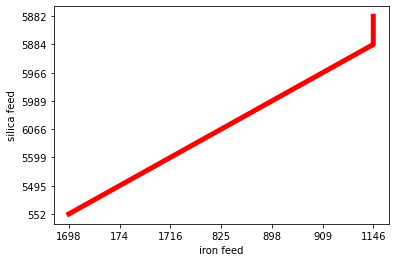

In [63]:

plt.plot(y,x,color='r',linewidth=5)
plt.ylabel("silica feed")
plt.xlabel("iron feed")
plt.show()

### ore pulp ph vs density


In [64]:
ph=df.iloc[1:100,6]
den=df.iloc[1:100,7]

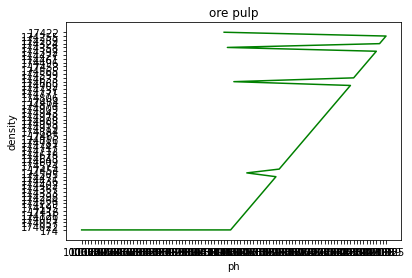

In [65]:
plt.plot(ph,den,color='g')
plt.xlabel('ph')
plt.ylabel('density')
plt.title('ore pulp')
plt.style.use('dark_background')

plt.show()